In [20]:

# coding=utf8
import pandas as pd
from bs4 import BeautifulSoup 
import re

df = pd.read_csv ("C:\\Users\\elifh\\OneDrive\\Masaüstü\\eksc.csv")


In [21]:

df.rename(columns = {'Unnamed: 0':'TEST'}, inplace = True)
df.rename(columns = {'0':'entry'}, inplace = True)



g = df
g['entry'] = g['entry'].astype("string")
g['entry'] = g['entry'].apply(lambda  entry: re.sub("(@[A-Za-z0-9]+)|(#)|(RT[\s]+)|(https?:\/\/\S+)|([^a-zA-Z0-9ğüşıöçİIĞÜŞÖÇ -])", "", entry))

print(g['entry'])
g['entry'] = g['entry'].str.replace(r'\r\n', '', regex=True)


0                      bkz beyin göçübkz kavimler göçü  
1          2015-2021 arası zirve yapmıştır ama asıl b...
2                                                       
3                bkz mesleki iyi hal belgesi haber linki
4          son zamanlarda ciddi ciddi hekimlik grupla...
                             ...                        
103        maalesef kardeşim ve eşinin de aralarına k...
104        kalacaklardöveriz de söveriz de gerekirse ...
105        20 yıllık cerrahlar kapıldı hala kalanları...
106        artık hastanede tedavi olamıyorum özel has...
107        türk hekimlerinin göçü en prestijli tıp de...
Name: entry, Length: 108, dtype: object


In [22]:
g = g.dropna()

In [96]:

from snowballstemmer import TurkishStemmer
turkStem=TurkishStemmer()

stemed = []
for a in g['entry']:
    for word in a.split():
        word = turkStem.stemWord(word)
        stemed.append(word)
    

In [ ]:
print(stemed)

In [ ]:
import requests
from bs4 import BeautifulSoup  
import urllib
source = open ("C:\\Users\\elifh\\OneDrive\\Masaüstü\\eksi\\stopwords-tr.txt", "r")


stopwords = ''
import os, sys
for x in source:
    stopwords += x
    
stopwords = stopwords.split()
stop = stopwords

stop.extend(["çok", "aynı","doktor","insan", "yeni", "sene", "insanlar","adam","tıp", " doktor", "doktor ","doktorlar", "doktorlar", "doktora", "doktorluk","hekim", "doktorların", "bir", " değil", "değil.", " değil ", "zaten", "bi", "mi", "değil", "bkz", "bkz "," bkz", 'acaba', 'acep', 'adamakıllı', 'adeta', 'ait', 'altmýþ', 'altmış', 'altý', 'altı', 'ama', 'amma', 'anca', 'ancak', 'arada', 'artýk', 'aslında', 'aynen', 'ayrıca', 'az', 'açıkça', 'açıkçası', 'bana', 'bari', 'bazen', 'bazý', 'bazı', 'başkası', 'baţka', 'belki', 'ben', 'benden', 'beni', 'benim', 'beri', 'beriki', 'beþ', 'beş', 'beţ', 'bilcümle', 'bile', 'bin', 'binaen', 'binaenaleyh', 'bir', 'biraz', 'birazdan', 'birbiri', 'birden', 'birdenbire', 'biri', 'birice', 'birileri', 'birisi', 'birkaç', 'birkaçı', 'birkez', 'birlikte', 'birçok', 'birçoğu', 'birþey', 'birþeyi', 'birşey', 'birşeyi', 'birţey', 'bitevi', 'biteviye', 'bittabi', 'biz', 'bizatihi', 'bizce', 'bizcileyin', 'bizden', 'bize', 'bizi', 'bizim', 'bizimki', 'bizzat', 'boşuna', 'bu', 'buna', 'bunda', 'bundan', 'bunlar', 'bunları', 'bunların', 'bunu', 'bunun', 'buracıkta', 'burada', 'buradan', 'burası', 'böyle', 'böylece', 'böylecene', 'böylelikle', 'böylemesine', 'böylesine', 'büsbütün', 'bütün', 'cuk', 'cümlesi', 'da', 'daha', 'dahi', 'dahil', 'dahilen', 'daima', 'dair', 'dayanarak', 'de', 'defa', 'dek', 'demin', 'demincek', 'deminden', 'denli', 'derakap', 'derhal', 'derken', 'deđil', 'değil', 'değin', 'diye', 'diđer', 'diğer', 'diğeri', 'doksan', 'dokuz', 'dolayı', 'dolayısıyla', 'doğru', 'dört', 'edecek', 'eden', 'ederek', 'edilecek', 'ediliyor', 'edilmesi', 'ediyor', 'elbet', 'elbette', 'elli', 'emme', 'en', 'enikonu', 'epey', 'epeyce', 'epeyi', 'esasen', 'esnasında', 'etmesi', 'etraflı', 'etraflıca', 'etti', 'ettiği', 'ettiğini', 'evleviyetle', 'evvel', 'evvela', 'evvelce', 'evvelden', 'evvelemirde', 'evveli', 'eđer', 'eğer', 'fakat', 'filanca', 'gah', 'gayet', 'gayetle', 'gayri', 'gayrı', 'gelgelelim', 'gene', 'gerek', 'gerçi', 'geçende', 'geçenlerde', 'gibi', 'gibilerden', 'gibisinden', 'gine', 'göre', 'gırla', 'hakeza', 'halbuki', 'halen', 'halihazırda', 'haliyle', 'handiyse', 'hangi', 'hangisi', 'hani', 'hariç', 'hasebiyle', 'hasılı', 'hatta', 'hele', 'hem', 'henüz', 'hep', 'hepsi', 'her', 'herhangi', 'herkes', 'herkesin', 'hiç', 'hiçbir', 'hiçbiri', 'hoş', 'hulasaten', 'iken', 'iki', 'ila', 'ile', 'ilen', 'ilgili', 'ilk', 'illa', 'illaki', 'imdi', 'indinde', 'inen', 'insermi', 'ise', 'ister', 'itibaren', 'itibariyle', 'itibarıyla', 'iyi', 'iyice', 'iyicene', 'için', 'iş', 'işte', 'iţte', 'kadar', 'kaffesi', 'kah', 'kala', 'kanýmca', 'karşın', 'katrilyon', 'kaynak', 'kaçı', 'kelli', 'kendi', 'kendilerine', 'kendini', 'kendisi', 'kendisine', 'kendisini', 'kere', 'kez', 'keza', 'kezalik', 'keşke', 'keţke', 'ki', 'kim', 'kimden', 'kime', 'kimi', 'kimisi', 'kimse', 'kimsecik', 'kimsecikler', 'külliyen', 'kýrk', 'kýsaca', 'kırk', 'kısaca', 'lakin', 'leh', 'lütfen', 'maada', 'madem', 'mademki', 'mamafih', 'mebni', 'međer', 'meğer', 'meğerki', 'meğerse', 'milyar', 'milyon', 'mu', 'mü', 'mý', 'mı', 'nasýl', 'nasıl', 'nasılsa', 'nazaran', 'naşi', 'ne', 'neden', 'nedeniyle', 'nedenle', 'nedense', 'nerde', 'nerden', 'nerdeyse', 'nere', 'nerede', 'nereden', 'neredeyse', 'neresi', 'nereye', 'netekim', 'neye', 'neyi', 'neyse', 'nice', 'nihayet', 'nihayetinde', 'nitekim', 'niye', 'niçin', 'o', 'olan', 'olarak', 'oldu', 'olduklarını', 'oldukça', 'olduğu', 'olduğunu', 'olmadı', 'olmadığı', 'olmak', 'olması', 'olmayan', 'olmaz', 'olsa', 'olsun', 'olup', 'olur', 'olursa', 'oluyor', 'on', 'ona', 'onca', 'onculayın', 'onda', 'ondan', 'onlar', 'onlardan', 'onlari', 'onlarýn', 'onları', 'onların', 'onu', 'onun', 'oracık', 'oracıkta', 'orada', 'oradan', 'oranca', 'oranla', 'oraya', 'otuz', 'oysa', 'oysaki', 'pek', 'pekala', 'peki', 'pekçe', 'peyderpey', 'rağmen', 'sadece', 'sahi', 'sahiden', 'sana', 'sanki', 'sekiz', 'seksen', 'sen', 'senden', 'seni', 'senin', 'siz', 'sizden', 'sizi', 'sizin', 'sonra', 'sonradan', 'sonraları', 'sonunda', 'tabii', 'tam', 'tamam', 'tamamen', 'tamamıyla', 'tarafından', 'tek', 'trilyon', 'tüm', 'var', 'vardı', 'vasıtasıyla', 've', 'velev', 'velhasıl', 'velhasılıkelam', 'veya', 'veyahut', 'ya', 'yahut', 'yakinen', 'yakında', 'yakından', 'yakınlarda', 'yalnız', 'yalnızca', 'yani', 'yapacak', 'yapmak', 'yaptı', 'yaptıkları', 'yaptığı', 'yaptığını', 'yapılan', 'yapılması', 'yapıyor', 'yedi', 'yeniden', 'yenilerde', 'yerine', 'yetmiþ', 'yetmiş', 'yetmiţ', 'yine', 'yirmi', 'yok', 'yoksa', 'yoluyla', 'yüz', 'yüzünden', 'zarfında', 'zaten', 'zati', 'zira', 'çabuk', 'çabukça', 'çeşitli', 'çok', 'çokları', 'çoklarınca', 'çokluk', 'çoklukla', 'çokça', 'çoğu', 'çoğun', 'çoğunca', 'çoğunlukla', 'çünkü', 'öbür', 'öbürkü', 'öbürü', 'önce', 'önceden', 'önceleri', 'öncelikle', 'öteki', 'ötekisi', 'öyle', 'öylece', 'öylelikle', 'öylemesine', 'öz', 'üzere', 'üç', 'þey', 'þeyden', 'þeyi', 'þeyler', 'þu', 'þuna', 'þunda', 'þundan', 'þunu', 'şayet', 'şey', 'şeyden', 'şeyi', 'şeyler', 'şu', 'şuna', 'şuncacık', 'şunda', 'şundan', 'şunlar', 'şunları', 'şunu', 'şunun', 'şura', 'şuracık', 'şuracıkta', 'şurası', 'şöyle', 'ţayet', 'ţimdi', 'ţu', 'ţöyle'])

filtered_text = []
for word in stemed:
    if word not in stop:
        filtered_text.append(word)
print(filtered_text)


In [101]:
l = ' '.join(stemed)

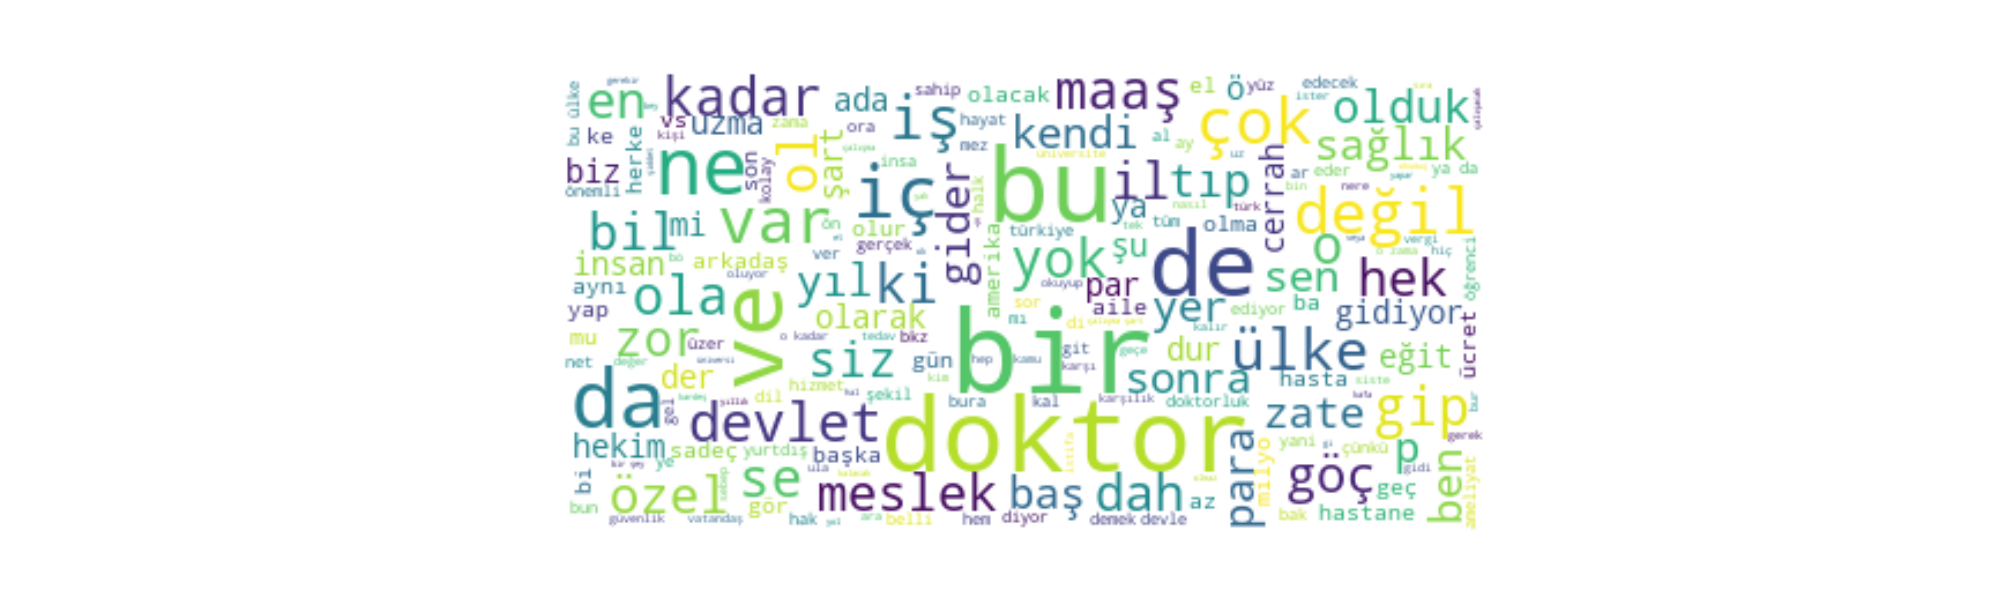

In [102]:


from os import path
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
text = l
wordcloud = WordCloud( max_font_size=50, max_words=200, background_color="white").generate(text)
fig = plt.figure(figsize = (20, 6)) 
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [66]:
pip install ipympl

     -------------------------------------- 510.3/510.3 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 137.8/137.8 kB 2.7 MB/s eta 0:00:00
     -------------------------------------- 384.3/384.3 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 3.0 MB/s eta 0:00:00



In [67]:
%matplotlib widget